This notebook shows the work we done in the first project in Metis data science bootcamp. Refer to [this article](https://rayanalthonian.github.io/2019/09/07/FirstProject/) for comments on the work done in this notebook. 

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
# Reading turnstile data from 04/27/2019 to 06/07/2019
df_MTA1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt',parse_dates=[[6, 7]])
df_MTA2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt',parse_dates=[[6, 7]])
df_MTA3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt',parse_dates=[[6, 7]])
df_MTA4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt',parse_dates=[[6, 7]])
df_MTA5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt',parse_dates=[[6, 7]])

# Concatenating the different DataFrames
df = pd.concat([df_MTA1,df_MTA2,df_MTA3,df_MTA4,df_MTA5])

### Data Pre-processing

In [3]:
# Remove spaces from column names 
df.columns=df.columns.str.strip() 
#cerate a joint(unique) identifier for the turnstile
df['TURNS_TILE_ID'] = df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']

In [4]:
#remove the not needed columns
df.drop(['LINENAME', 'DIVISION', 'C/A', 'DESC'], axis=1, inplace=True)
df.head()

,DATE_TIME,UNIT,SCP,STATION,ENTRIES,EXITS,TURNS_TILE_ID
0,2019-04-27 00:00:00,R051,02-00-00,59 ST,7035249,2384833,R051_02-00-00_59 ST
1,2019-04-27 04:00:00,R051,02-00-00,59 ST,7035269,2384840,R051_02-00-00_59 ST
2,2019-04-27 08:00:00,R051,02-00-00,59 ST,7035292,2384875,R051_02-00-00_59 ST
3,2019-04-27 12:00:00,R051,02-00-00,59 ST,7035392,2384951,R051_02-00-00_59 ST
4,2019-04-27 16:00:00,R051,02-00-00,59 ST,7035651,2385020,R051_02-00-00_59 ST


In [5]:
#Reorganize the columns
df_temp=df.iloc[::,[6,0,4,5,1,2,3]]
df_temp.head()

,TURNS_TILE_ID,DATE_TIME,ENTRIES,EXITS,UNIT,SCP,STATION
0,R051_02-00-00_59 ST,2019-04-27 00:00:00,7035249,2384833,R051,02-00-00,59 ST
1,R051_02-00-00_59 ST,2019-04-27 04:00:00,7035269,2384840,R051,02-00-00,59 ST
2,R051_02-00-00_59 ST,2019-04-27 08:00:00,7035292,2384875,R051,02-00-00,59 ST
3,R051_02-00-00_59 ST,2019-04-27 12:00:00,7035392,2384951,R051,02-00-00,59 ST
4,R051_02-00-00_59 ST,2019-04-27 16:00:00,7035651,2385020,R051,02-00-00,59 ST


In [17]:
# Create a sorted dataframe
df_temp1=(df_temp.sort_values(by=['TURNS_TILE_ID','DATE_TIME']))
# Take the diff between each turnstile ids
df_temp1=df_temp1.iloc[::,[0,1,2,3]].groupby(['TURNS_TILE_ID']).diff()
#This will show the difference for entries and exits
df_temp1.head(10)

,DATE_TIME,ENTRIES,EXITS
10583,NaT,NaN,NaN
10584,04:00:00,44.0,27.0
10585,04:00:00,235.0,51.0
10586,04:00:00,480.0,116.0
10587,04:00:00,540.0,158.0
10588,04:00:00,419.0,145.0
10589,04:00:00,171.0,156.0
10590,04:00:00,41.0,28.0
10591,04:00:00,185.0,39.0
10592,04:00:00,315.0,70.0


In [18]:
#Rename columns
df_temp1.rename(columns={'ENTRIES': 'DELTA_ENTRIES'}, inplace=True)
df_temp1.rename(columns={'EXITS': 'DELTA_EXITS'}, inplace=True)
df_temp1

,DATE_TIME,DELTA_ENTRIES,DELTA_EXITS
10583,NaT,NaN,NaN
10584,04:00:00,44.0,27.0
10585,04:00:00,235.0,51.0
10586,04:00:00,480.0,116.0
10587,04:00:00,540.0,158.0
...,...,...,...
113215,04:00:00,8.0,10.0
113216,04:00:00,441.0,69.0
113217,04:00:00,320.0,72.0
113218,04:00:00,332.0,80.0


In [19]:
#Sort temp2 dataFrame to match temp1
df_temp2 = (df_temp.sort_values(by=['TURNS_TILE_ID','DATE_TIME']))
df_temp2.head()

,TURNS_TILE_ID,DATE_TIME,ENTRIES,EXITS,UNIT,SCP,STATION
10583,R001_00-00-00_WHITEHALL S-FRY,2019-04-27 01:00:00,4259015,2609893,R001,00-00-00,WHITEHALL S-FRY
10584,R001_00-00-00_WHITEHALL S-FRY,2019-04-27 05:00:00,4259059,2609920,R001,00-00-00,WHITEHALL S-FRY
10585,R001_00-00-00_WHITEHALL S-FRY,2019-04-27 09:00:00,4259294,2609971,R001,00-00-00,WHITEHALL S-FRY
10586,R001_00-00-00_WHITEHALL S-FRY,2019-04-27 13:00:00,4259774,2610087,R001,00-00-00,WHITEHALL S-FRY
10587,R001_00-00-00_WHITEHALL S-FRY,2019-04-27 17:00:00,4260314,2610245,R001,00-00-00,WHITEHALL S-FRY


In [20]:
#Include the remaining columns
df_temp1['TURNS_TILE_ID']=df_temp2['TURNS_TILE_ID']
df_temp1['ENTRIES']=df_temp2['ENTRIES']
df_temp1['EXITS']=df_temp2['EXITS']
df_temp1['STATION']=df_temp2['STATION']
df_temp1['DATE_TIME']=df_temp2['DATE_TIME']
df_temp1.head(10)

,DATE_TIME,DELTA_ENTRIES,DELTA_EXITS,TURNS_TILE_ID,ENTRIES,EXITS,STATION
10583,2019-04-27 01:00:00,NaN,NaN,R001_00-00-00_WHITEHALL S-FRY,4259015,2609893,WHITEHALL S-FRY
10584,2019-04-27 05:00:00,44.0,27.0,R001_00-00-00_WHITEHALL S-FRY,4259059,2609920,WHITEHALL S-FRY
10585,2019-04-27 09:00:00,235.0,51.0,R001_00-00-00_WHITEHALL S-FRY,4259294,2609971,WHITEHALL S-FRY
10586,2019-04-27 13:00:00,480.0,116.0,R001_00-00-00_WHITEHALL S-FRY,4259774,2610087,WHITEHALL S-FRY
10587,2019-04-27 17:00:00,540.0,158.0,R001_00-00-00_WHITEHALL S-FRY,4260314,2610245,WHITEHALL S-FRY
10588,2019-04-27 21:00:00,419.0,145.0,R001_00-00-00_WHITEHALL S-FRY,4260733,2610390,WHITEHALL S-FRY
10589,2019-04-28 01:00:00,171.0,156.0,R001_00-00-00_WHITEHALL S-FRY,4260904,2610546,WHITEHALL S-FRY
10590,2019-04-28 05:00:00,41.0,28.0,R001_00-00-00_WHITEHALL S-FRY,4260945,2610574,WHITEHALL S-FRY
10591,2019-04-28 09:00:00,185.0,39.0,R001_00-00-00_WHITEHALL S-FRY,4261130,2610613,WHITEHALL S-FRY
10592,2019-04-28 13:00:00,315.0,70.0,R001_00-00-00_WHITEHALL S-FRY,4261445,2610683,WHITEHALL S-FRY


In [21]:
#Reorganize the columns
df_temp1=df_temp1.iloc[::,[0,3,1,2,6,4,5]]
#To remove nan form entries and exits 
df_temp1.dropna(axis=0,inplace=True)
df_temp1.head()

<ipython-input-21-d20fe0346891>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp1.dropna(axis=0,inplace=True)


,DATE_TIME,TURNS_TILE_ID,DELTA_ENTRIES,DELTA_EXITS,STATION,ENTRIES,EXITS
10584,2019-04-27 05:00:00,R001_00-00-00_WHITEHALL S-FRY,44.0,27.0,WHITEHALL S-FRY,4259059,2609920
10585,2019-04-27 09:00:00,R001_00-00-00_WHITEHALL S-FRY,235.0,51.0,WHITEHALL S-FRY,4259294,2609971
10586,2019-04-27 13:00:00,R001_00-00-00_WHITEHALL S-FRY,480.0,116.0,WHITEHALL S-FRY,4259774,2610087
10587,2019-04-27 17:00:00,R001_00-00-00_WHITEHALL S-FRY,540.0,158.0,WHITEHALL S-FRY,4260314,2610245
10588,2019-04-27 21:00:00,R001_00-00-00_WHITEHALL S-FRY,419.0,145.0,WHITEHALL S-FRY,4260733,2610390


In [22]:
df_final = df_temp1.copy()
df_final.head()

,DATE_TIME,TURNS_TILE_ID,DELTA_ENTRIES,DELTA_EXITS,STATION,ENTRIES,EXITS
10584,2019-04-27 05:00:00,R001_00-00-00_WHITEHALL S-FRY,44.0,27.0,WHITEHALL S-FRY,4259059,2609920
10585,2019-04-27 09:00:00,R001_00-00-00_WHITEHALL S-FRY,235.0,51.0,WHITEHALL S-FRY,4259294,2609971
10586,2019-04-27 13:00:00,R001_00-00-00_WHITEHALL S-FRY,480.0,116.0,WHITEHALL S-FRY,4259774,2610087
10587,2019-04-27 17:00:00,R001_00-00-00_WHITEHALL S-FRY,540.0,158.0,WHITEHALL S-FRY,4260314,2610245
10588,2019-04-27 21:00:00,R001_00-00-00_WHITEHALL S-FRY,419.0,145.0,WHITEHALL S-FRY,4260733,2610390


In [23]:
df_final.DELTA_ENTRIES.describe()

count    1.021907e+06
mean     2.781380e+03
std      3.898439e+06
min     -1.661416e+09
25%      9.000000e+00
50%      7.000000e+01
75%      2.330000e+02
max      2.055526e+09
Name: DELTA_ENTRIES, dtype: float64

In [24]:
# We assummed that the number of people who can pass one SCP are 60*60*4=15000
#delete all rows with defected data
df_final[(df_final.DELTA_ENTRIES > 15000) | (df_final.DELTA_EXITS > 15000)]

,DATE_TIME,TURNS_TILE_ID,DELTA_ENTRIES,DELTA_EXITS,STATION,ENTRIES,EXITS
61184,2019-05-24 11:00:00,R028_00-02-00_FULTON ST,564512564.0,559329088.0,FULTON ST,569319973,569321448
44868,2019-05-13 08:00:00,R035_02-05-00_168 ST,453687.0,0.0,168 ST,458754,0
155400,2019-05-15 20:00:00,R044_03-03-01_BROOKLYN BRIDGE,320118.0,5367471.0,BROOKLYN BRIDGE,9290094,10441409
155440,2019-05-15 12:00:00,R044_03-03-02_BROOKLYN BRIDGE,319008.0,5368363.0,BROOKLYN BRIDGE,9288333,10441176
162494,2019-05-11 00:00:00,R046_02-03-00_GRD CNTRL-42 ST,18424.0,734.0,GRD CNTRL-42 ST,654373970,616228752
...,...,...,...,...,...,...,...
119762,2019-05-24 15:36:46,R550_01-01-01_LACKAWANNA,49034.0,51166.0,LACKAWANNA,95255,64695
121070,2019-05-06 15:23:39,R550_01-02-00_LACKAWANNA,183471.0,1140653.0,LACKAWANNA,195170,1224167
121088,2019-05-09 14:34:42,R550_01-02-00_LACKAWANNA,183916.0,1144868.0,LACKAWANNA,195824,1229570
117647,2019-05-16 08:29:49,R551_00-04-00_GROVE STREET,155968.0,-3613.0,GROVE STREET,234351,95418


In [25]:
# Filtering the data that are greater than our assumption 
df_final = df_final[(df_final.DELTA_ENTRIES<15000)]
df_final = df_final[(df_final.DELTA_EXITS<15000)]
df_final = df_final[(df_final.DELTA_ENTRIES>=0)]
df_final = df_final[(df_final.DELTA_EXITS>=0)]

In [26]:
df_final.DELTA_ENTRIES.describe()

count    1.009488e+06
mean     1.726448e+02
std      2.562242e+02
min      0.000000e+00
25%      1.000000e+01
50%      7.200000e+01
75%      2.350000e+02
max      1.375900e+04
Name: DELTA_ENTRIES, dtype: float64

In [34]:
df_final['day_of_week'] = df_final['DATE_TIME'].dt.day_name()
df_final['Time']= df_final['DATE_TIME'].dt.time
df_final['Date']= df_final['DATE_TIME'].dt.date
df_final.head()

,DATE_TIME,TURNS_TILE_ID,DELTA_ENTRIES,DELTA_EXITS,STATION,ENTRIES,EXITS,day_of_week,Time,Date
10584,2019-04-27 05:00:00,R001_00-00-00_WHITEHALL S-FRY,44.0,27.0,WHITEHALL S-FRY,4259059,2609920,Saturday,05:00:00,2019-04-27
10585,2019-04-27 09:00:00,R001_00-00-00_WHITEHALL S-FRY,235.0,51.0,WHITEHALL S-FRY,4259294,2609971,Saturday,09:00:00,2019-04-27
10586,2019-04-27 13:00:00,R001_00-00-00_WHITEHALL S-FRY,480.0,116.0,WHITEHALL S-FRY,4259774,2610087,Saturday,13:00:00,2019-04-27
10587,2019-04-27 17:00:00,R001_00-00-00_WHITEHALL S-FRY,540.0,158.0,WHITEHALL S-FRY,4260314,2610245,Saturday,17:00:00,2019-04-27
10588,2019-04-27 21:00:00,R001_00-00-00_WHITEHALL S-FRY,419.0,145.0,WHITEHALL S-FRY,4260733,2610390,Saturday,21:00:00,2019-04-27


### Data Visualization

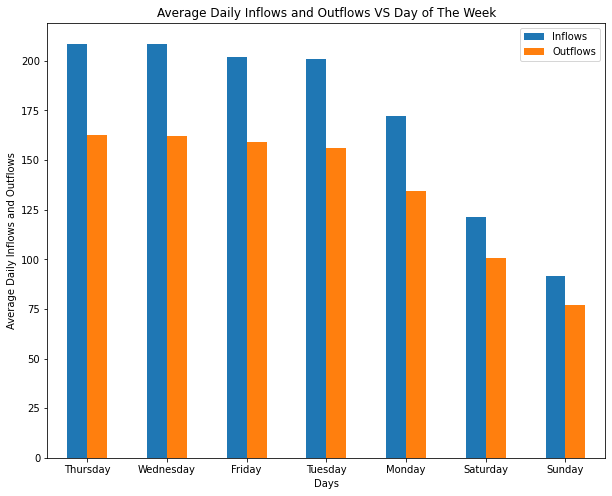

In [43]:
#Bar chart that shows the average daily inflows and outflows for each day of the week
#in a descending order 
Days_of_week=df_final.groupby(('day_of_week')).mean().sort_values('DELTA_ENTRIES',ascending= False).iloc[::,[0,1]]
Days_of_week_bar=Days_of_week.nlargest(7,'DELTA_ENTRIES').plot.bar(figsize=(10,8),rot=0);
Days_of_week_bar.set_xlabel("Days")
Days_of_week_bar.set_ylabel("Average Daily Inflows and Outflows")
Days_of_week_bar.set_title("Average Daily Inflows and Outflows VS Day of The Week")
Days_of_week_bar.legend(['Inflows','Outflows']);

In [46]:
df_final['Volume'] = df_final['DELTA_ENTRIES'] + df_final['DELTA_EXITS']
df_final.head()

,DATE_TIME,TURNS_TILE_ID,DELTA_ENTRIES,DELTA_EXITS,STATION,ENTRIES,EXITS,day_of_week,Time,Date,Volume
10584,2019-04-27 05:00:00,R001_00-00-00_WHITEHALL S-FRY,44.0,27.0,WHITEHALL S-FRY,4259059,2609920,Saturday,05:00:00,2019-04-27,71.0
10585,2019-04-27 09:00:00,R001_00-00-00_WHITEHALL S-FRY,235.0,51.0,WHITEHALL S-FRY,4259294,2609971,Saturday,09:00:00,2019-04-27,286.0
10586,2019-04-27 13:00:00,R001_00-00-00_WHITEHALL S-FRY,480.0,116.0,WHITEHALL S-FRY,4259774,2610087,Saturday,13:00:00,2019-04-27,596.0
10587,2019-04-27 17:00:00,R001_00-00-00_WHITEHALL S-FRY,540.0,158.0,WHITEHALL S-FRY,4260314,2610245,Saturday,17:00:00,2019-04-27,698.0
10588,2019-04-27 21:00:00,R001_00-00-00_WHITEHALL S-FRY,419.0,145.0,WHITEHALL S-FRY,4260733,2610390,Saturday,21:00:00,2019-04-27,564.0


Text(0.5, 1.0, 'Top 5 Stations in terms of Volume ')

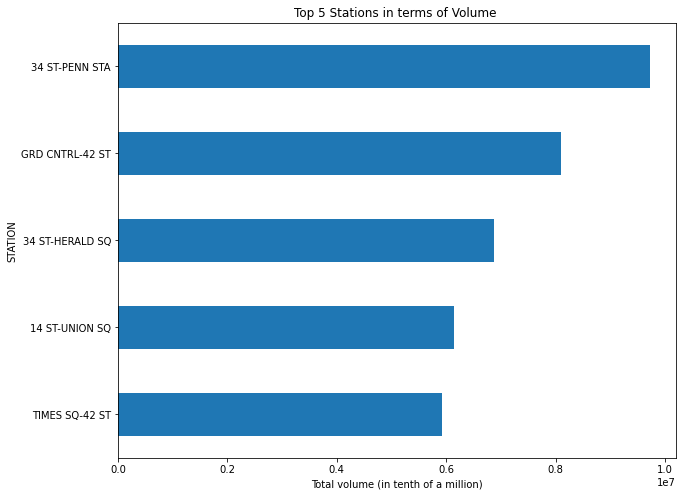

In [47]:
bar=df_final.groupby(('STATION')).sum().sort_values('Volume',ascending= False)
ty = bar.nlargest(5,'Volume')[['Volume']].sort_values('Volume',ascending= True).plot.barh(figsize=(10,8),legend=False);
ty.set_xlabel("Total volume (in tenth of a million)")
ty.set_title("Top 5 Stations in terms of Volume ")

Text(0.5, 1.0, 'Average Daily Volume VS Day of The Week')

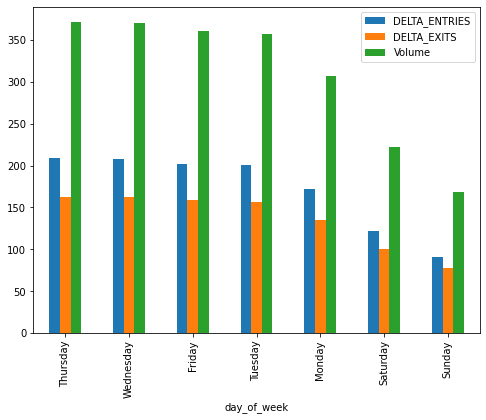

In [51]:
Days_of_week_vol=df_final.groupby(('day_of_week')).mean().sort_values('Volume',ascending= False).iloc[::,[0,1,4]]
Days_of_week_vol_bar=Days_of_week_vol.nlargest(7,'Volume').plot.bar(figsize=(8,6));
Days_of_week_bar.set_xlabel("Days")
Days_of_week_bar.set_ylabel("Average Daily Volume")
Days_of_week_bar.set_title("Average Daily Volume VS Day of The Week")

Text(0.5, 1.0, 'Average Daily Volume VS Day of The Week')

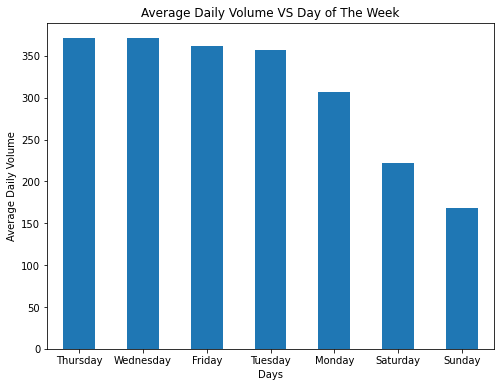

In [52]:
Days_of_week_vol_bar=df_final.groupby("day_of_week")['Volume'].mean().sort_values(ascending= False).plot(kind='bar',figsize=(8,6),rot=0)
Days_of_week_vol_bar.set_xlabel("Days")
Days_of_week_vol_bar.set_ylabel("Average Daily Volume")
Days_of_week_vol_bar.set_title("Average Daily Volume VS Day of The Week")

In [53]:
df_final_trancated = df_final.copy()
df_final_trancated['Time'] = df_final_trancated.DATE_TIME.dt.floor('h').dt.time

In [76]:
pd.plotting.register_matplotlib_converters()

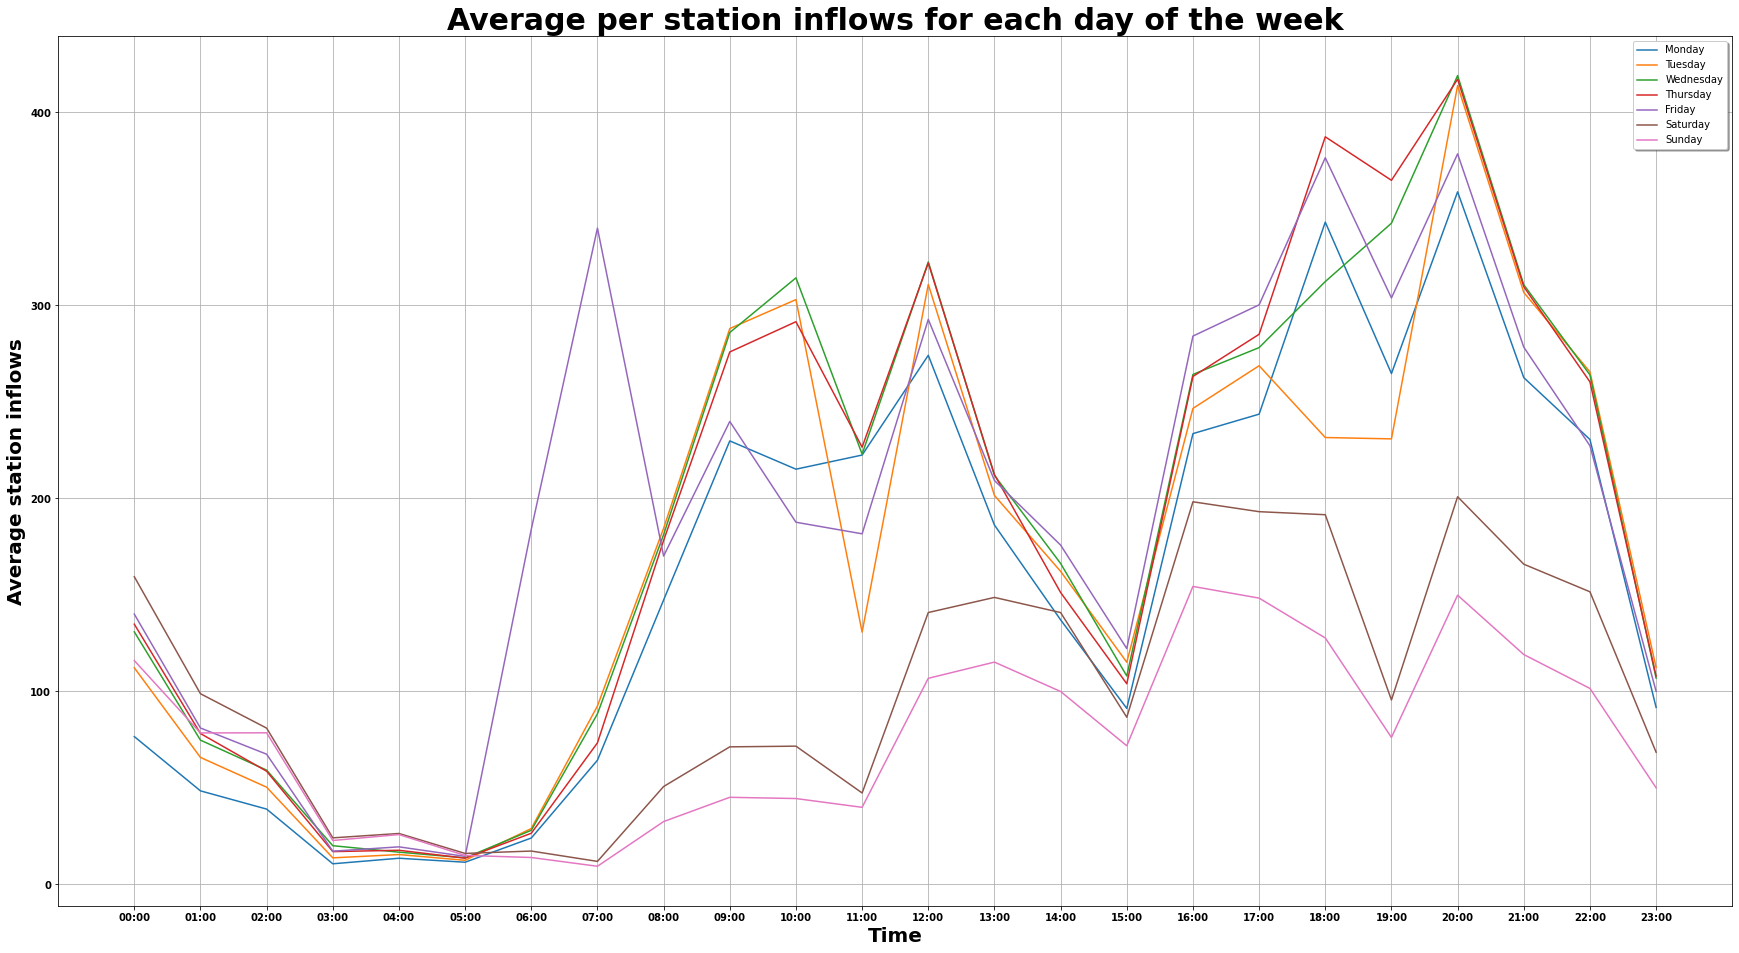

In [78]:
x=df_final_trancated.groupby(['day_of_week','Time']).agg({'DELTA_ENTRIES':np.mean}).sort_values(['day_of_week','Time'],ascending= True)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize = [30,16]) # [width, height]
plt.xlabel('Time',fontsize = 20, weight='bold');
plt.ylabel('Average station inflows', fontsize = 20, weight='bold')

plt.grid()
ticks_y = np.linspace(0, 400, 5)
ticks_x = x.xs(day, drop_level=True).index
plt.xticks(ticks_x, weight='bold')
plt.yticks(ticks_y, weight='bold');

for day in days:
    idx = x.xs(day, drop_level=True).index
    y = x.xs(day, drop_level=True).values
    
    plt.plot(idx, y)
   
plt.title('Average per station inflows for each day of the week',fontsize = 30, weight='bold')

plt.legend(days,shadow = True, loc = 0);